### Implement steps:
1. read data from csv file
2. drop the 'sex' column (since it is unrelated)
3. change age "110+" to "100" for conveniently type casting (from str to int)
4. type of 'age' converted to 'int' for convenient comparison

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data.csv')

df.drop(columns=['sex'], inplace=True)

df.loc[df.loc[:, 'age'] == "110+", 'age'] = "110"

df['age'] = df['age'].astype('int32')

2. divide rows into different groups(children, elderly, and labor force) according to 'age' attribute
3. drop 'age' column, since rows are grouped and thus 'age' becomes redundant
4. for each group, apply 'sum' function to calculate the total population of this group for every year

In [3]:
labor_force_s = df[(df['age'] >= 15) & (df['age'] <= 64)].drop('age', axis=1).apply(sum)

children_s = df[df['age'] < 15].drop('age', axis=1).apply(sum)

elderly_s = df[df['age'] >= 65].drop('age', axis=1).apply(sum)

### Question 1
calculate depencency ratio for every year, and draw the plot

Text(0.5, 1.0, 'Dependency ratio of Sweden from 1860 to 2022')

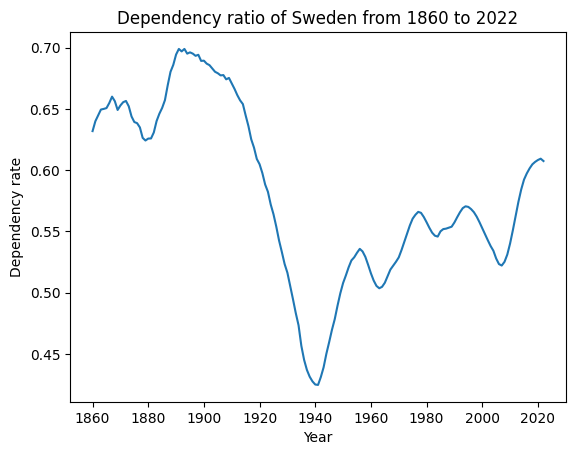

In [4]:
dependency_ratio_s = ((children_s + elderly_s) / labor_force_s)

plt.plot(dependency_ratio_s)
plt.xlabel('Year')
plt.ylabel('Dependency rate')
plt.xticks(range(0, 2022 - 1860, 20))
plt.title('Dependency ratio of Sweden from 1860 to 2022')

### Question 2
calculate the fraction of the children, the elderly, and the total dependent population of the total Swedish population from 1860
to 2022

Text(0.5, 1.0, 'Dependency ratio of Sweden from 1860 to 2022')

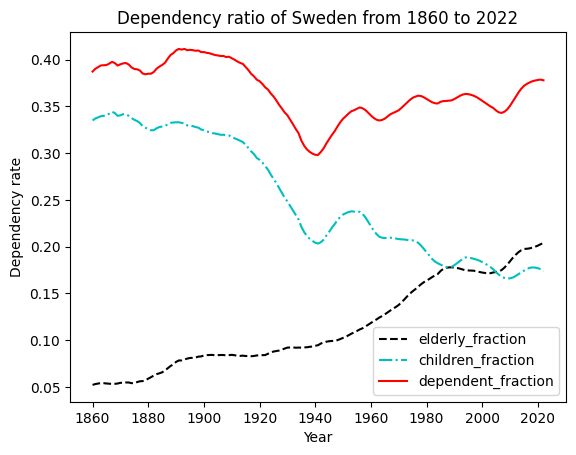

In [6]:
total_population_s = labor_force_s + children_s + elderly_s

elderly_fraction_s = elderly_s / total_population_s

children_fraction_s = children_s / total_population_s

dependent_fraction_s = elderly_fraction_s + children_fraction_s


plt.plot(elderly_fraction_s, '--k',label="elderly_fraction")
plt.plot(children_fraction_s, '-.c',label="children_fraction")
plt.plot(dependent_fraction_s, '-r',label="dependent_fraction")
plt.legend()
plt.xlabel('Year')
plt.ylabel('Dependency rate')
plt.xticks(range(0, 2022 - 1860, 20))
plt.title('Dependency ratio of Sweden from 1860 to 2022')

### Question 3

Discuss the development of the Swedish population in light of these figures;
how have the Swedish demographics changed over the years and why, and
relate this to what you know (or can find out) about general trends of
population among industrialized countries.


1. For Dependency ratio of Sweden from 1860 to 2022
In the early 20th century, the dependency ratio increased rapidly, reaching a peak close to 0.70. But starting in the 1920s, the dependency ratio dropped greatly, reaching a low point in the 1940s. From the 1950s to the 1980s, there were several small fluctuations, and then the ratio began to increase again from the 2000s, reaching close to 0.60 by 2022.

In the early 20th century, the total dependency ratio was very high because of a largely agricultural society with many children and high birth rates. After the 1940s, the total dependency ratio gradually decreased, reaching a low point as birth rates decreased while the working-age population remained large. However, from the 1960s to 2022, the dependency ratio began rising again as the country faced a growing aging population.

2. For Dependency ratio of Sweden from 1860 to 2022
Between 1860 and the 1940s, the children's proportion was high, but then it began to decline steadily. And the elderly population proportion was initially low but gradually increased after 1900, rising significantly after the 1970s. 

Since the mid-20th century, public health improvements better living conditions have led to increased life expectancy. Besides, between 1940 and 1980, European countries experienced rapid industrialization and urbanization, which increased the costs of living and child-rearing and reduced the birth rate.
